<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


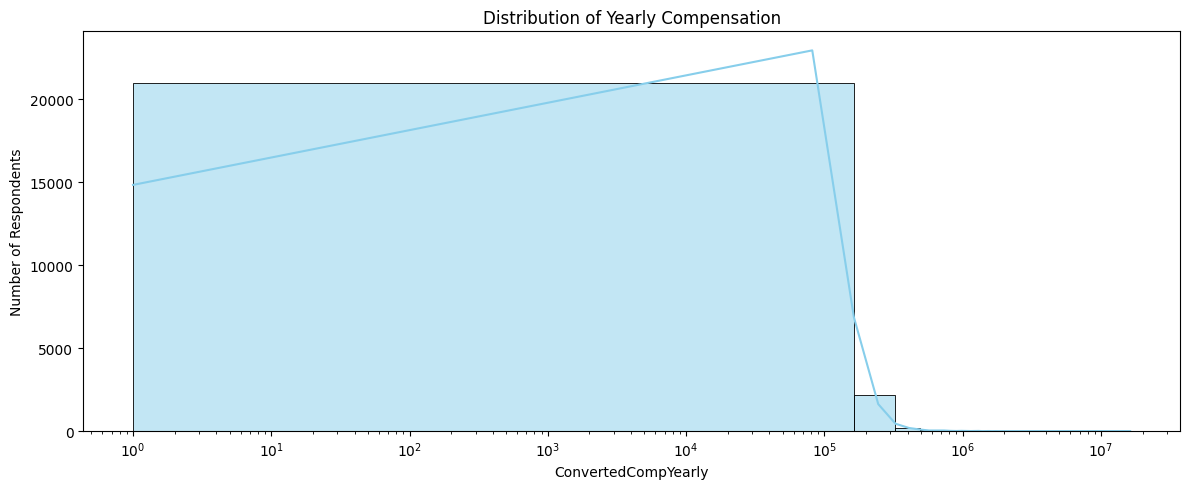

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Ensure numeric types for key columns
# -----------------------------
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")
df["WorkExp"] = pd.to_numeric(df["WorkExp"], errors="coerce")
df["JobSatPoints_1"] = pd.to_numeric(df["JobSatPoints_1"], errors="coerce")

# Filter out missing or invalid compensation values
comp_df = df[df["ConvertedCompYearly"] > 0].copy()
# -----------------------------
plt.figure(figsize=(12, 5))
sns.histplot(comp_df["ConvertedCompYearly"], bins=100, kde=True, color="skyblue")
plt.title("Distribution of Yearly Compensation")
plt.xlabel("ConvertedCompYearly")
plt.ylabel("Number of Respondents")
plt.xscale("log")  # Log scale helps with skewed compensation data
plt.tight_layout()
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [6]:
fulltime_median = comp_df[comp_df["Employment"] == "Employed, full-time"]["ConvertedCompYearly"].median()
print(f"Median compensation for full-time employed respondents: {fulltime_median:,.2f}")


Median compensation for full-time employed respondents: 69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



/tmp/ipykernel_549/36411181.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


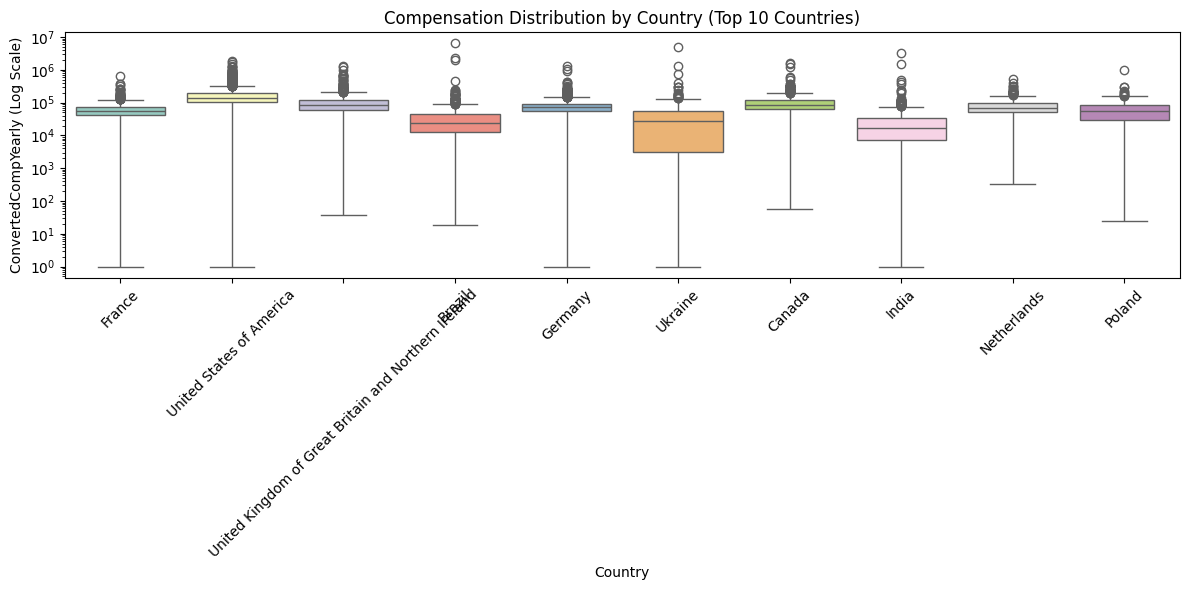

In [4]:
top_countries = comp_df["Country"].value_counts().head(10).index
comp_top_countries = comp_df[comp_df["Country"].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(
    x="Country",
    y="ConvertedCompYearly",
    data=comp_top_countries,
    palette="Set3"
)
plt.yscale("log")  # Log scale to better visualize skewed distributions
plt.title("Compensation Distribution by Country (Top 10 Countries)")
plt.ylabel("ConvertedCompYearly (Log Scale)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


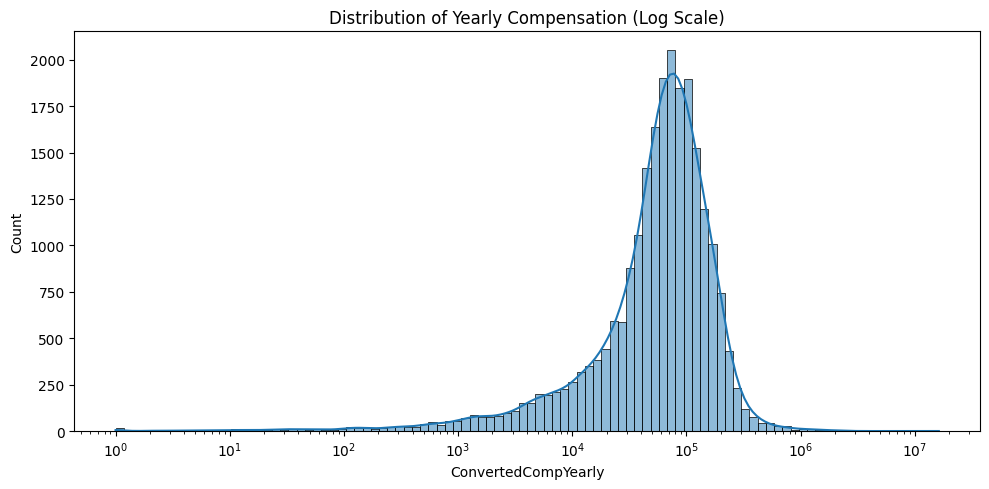

Median compensation (Full-time employees): 69,814.00


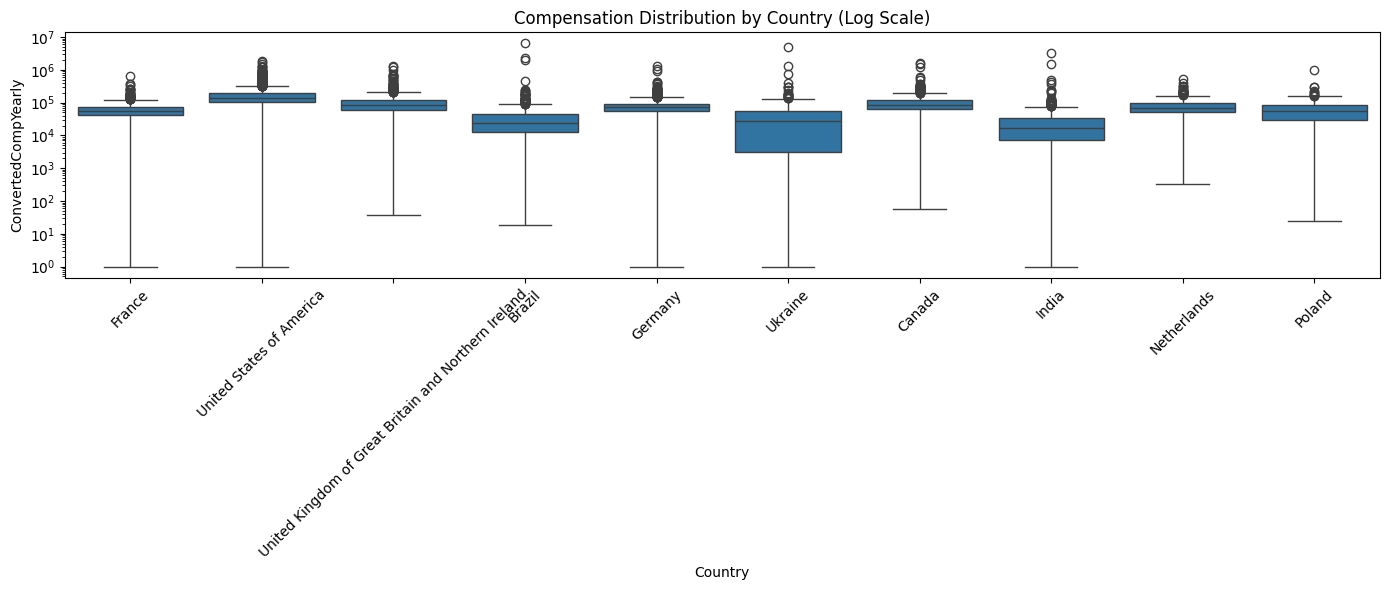

Original rows: 23435
After outlier removal: 22457

Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.406993       -0.059643
WorkExp                         0.406993  1.000000       -0.032388
JobSatPoints_1                 -0.059643 -0.032388        1.000000


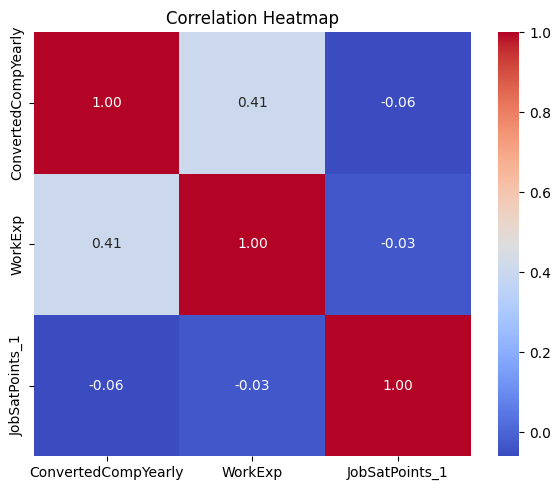

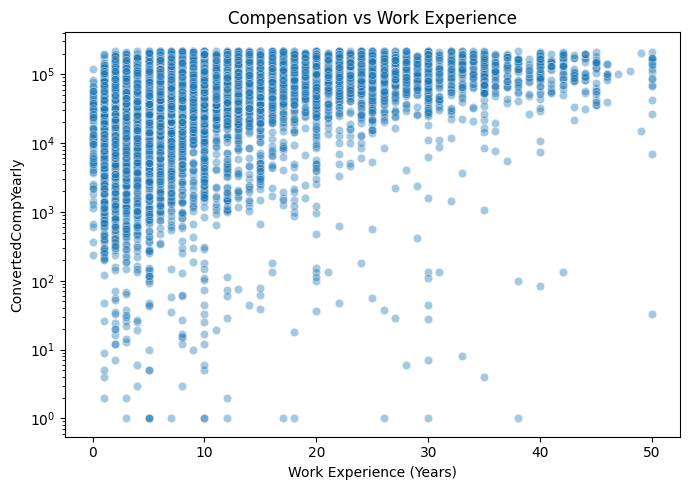

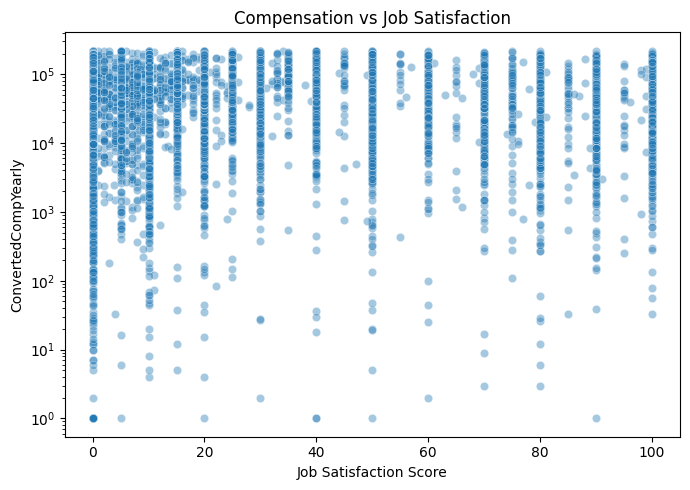

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# =========================================================
# 1. Clean ConvertedCompYearly
# =========================================================
df["ConvertedCompYearly"] = pd.to_numeric(
    df["ConvertedCompYearly"], errors="coerce"
)

# Keep only valid positive compensation values
comp_df = df[df["ConvertedCompYearly"] > 0].copy()

# =========================================================
# 2. Distribution & Histogram of ConvertedCompYearly
# =========================================================
plt.figure(figsize=(10, 5))
sns.histplot(
    comp_df["ConvertedCompYearly"],
    bins=100,
    kde=True,
    log_scale=True
)
plt.title("Distribution of Yearly Compensation (Log Scale)")
plt.xlabel("ConvertedCompYearly")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =========================================================
# 3. Median Compensation for Full-Time Employees
# =========================================================
full_time_median = comp_df.loc[
    comp_df["Employment"] == "Employed, full-time",
    "ConvertedCompYearly"
].median()

print(f"Median compensation (Full-time employees): {full_time_median:,.2f}")

# =========================================================
# 4. Compensation by Country (Box Plots)
# =========================================================
# Limit to top 10 countries by respondent count for readability
top_countries = (
    comp_df["Country"]
    .value_counts()
    .head(10)
    .index
)

country_df = comp_df[comp_df["Country"].isin(top_countries)]

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=country_df,
    x="Country",
    y="ConvertedCompYearly"
)
plt.yscale("log")
plt.title("Compensation Distribution by Country (Log Scale)")
plt.xlabel("Country")
plt.ylabel("ConvertedCompYearly")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =========================================================
# 5. Remove Outliers using IQR Method
# =========================================================
Q1 = comp_df["ConvertedCompYearly"].quantile(0.25)
Q3 = comp_df["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = comp_df[
    (comp_df["ConvertedCompYearly"] >= lower_bound) &
    (comp_df["ConvertedCompYearly"] <= upper_bound)
].copy()

print(f"Original rows: {len(comp_df)}")
print(f"After outlier removal: {len(df_no_outliers)}")

# =========================================================
# 6. Correlation Analysis
# =========================================================
# Ensure numeric types
df_no_outliers["WorkExp"] = pd.to_numeric(
    df_no_outliers["WorkExp"], errors="coerce"
)

df_no_outliers["JobSatPoints_1"] = pd.to_numeric(
    df_no_outliers["JobSatPoints_1"], errors="coerce"
)

corr_df = df_no_outliers[
    ["ConvertedCompYearly", "WorkExp", "JobSatPoints_1"]
].dropna()

# Correlation matrix
corr_matrix = corr_df.corr(method="pearson")

print("\nCorrelation Matrix:")
print(corr_matrix)

# =========================================================
# 7. Correlation Heatmap
# =========================================================
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# =========================================================
# 8. Scatter Plots
# =========================================================
# Compensation vs Work Experience
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=corr_df,
    x="WorkExp",
    y="ConvertedCompYearly",
    alpha=0.4
)
plt.yscale("log")
plt.title("Compensation vs Work Experience")
plt.xlabel("Work Experience (Years)")
plt.ylabel("ConvertedCompYearly")
plt.tight_layout()
plt.show()

# Compensation vs Job Satisfaction
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=corr_df,
    x="JobSatPoints_1",
    y="ConvertedCompYearly",
    alpha=0.4
)
plt.yscale("log")
plt.title("Compensation vs Job Satisfaction")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("ConvertedCompYearly")
plt.tight_layout()
plt.show()


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [ ]:
## Write your code here

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


In [ ]:
## Write your code here

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
